<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
from numpy import linspace, meshgrid, zeros, sin, arcsin, sqrt
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------

We can consider this as a special case of an ellipsoid, which is given by the equation $$\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2}=1$$
with $a=b$. So this is eqaul to the yz plane rotating by $2\pi$. Setting $x = 0$ in the above equation gives $$frac{y^2}{\beta^2}+frac{z^2}{c^2}=1$$
So the integral becomes $$A = 2\pi \int_{-\beta}^{\beta}y \sqrt{1-(\frac{dz}{dy})^2}$$
solving z in terms of y gives $$z = \beta \sqrt{1-\frac{y^2}{\beta^2}}$$
So $$\frac{dz}{dy} = -\frac{cy}{\beta \sqrt{\beta^2-y^2}}$$
Thus $$A = 2\pi \int_{-\beta}^{\beta}y \sqrt{1-(\frac{cy}{\beta \sqrt{\beta^2-y^2}})^2}$$


-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 



## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_95794/1634597831.py:6: RuntimeWarning: invalid value encountered in sqrt
  return beta * np.sqrt(1 - (x/beta)**2) * np.sqrt(1 + (2*np.sqrt(c**2 - (c*x/beta)**2)/c**2)**2)
/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_95794/1634597831.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  formula_area = 2 * pi * beta**2 * (1 + (c / (beta * e)) * arcsin(e))
/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_95794/1634597831.py:36: RuntimeWarning: invalid value encountered in double_scalars
  formula_area = 2 * pi * beta**2 * (1 + (c / (beta * e)) * arcsin(e))
/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_95794/1634597831.py:33: RuntimeWarning: invalid value encountered in sqrt
  e = sqrt(1 - (beta**2 / c**2))


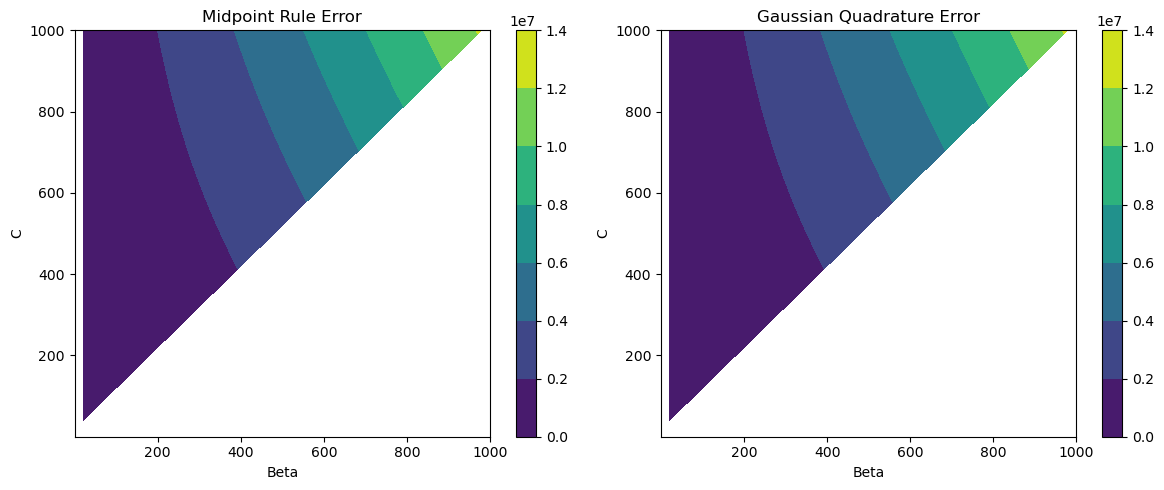

'--------------------Write your code above this line------------------------------'

In [2]:
'''--------------------Write your code below this line------------------------------'''
from scipy.special import roots_legendre
pi = np.pi

def integrand(x, beta, c):
    return beta * np.sqrt(1 - (x/beta)**2) * np.sqrt(1 + (2*np.sqrt(c**2 - (c*x/beta)**2)/c**2)**2)

def midpoint_rule(f, a, b, n, beta, c):
    h = (b - a) / n
    result = 0
    for i in range(n):
        x = a + (i + 0.5) * h
        result += f(x, beta, c)
    return result * h

def gaussian_quadrature(f, a, b, n, beta, c):
    [x, w] = roots_legendre(n)
    x = 0.5 * (x + 1) * (b - a) + a
    w = 0.5 * w * (b - a)
    return np.sum(w * f(x, beta, c))

n = 100  # number of intervals or points
beta_min, beta_max = 0.001, 1000
c_min, c_max = 0.001, 1000
beta_values = linspace(beta_min, beta_max, 50)
c_values = linspace(c_min, c_max, 50)

beta_grid, c_grid = meshgrid(beta_values, c_values)
midpoint_errors = []
gaussian_errors = []

for beta, c in zip(beta_grid.flatten(), c_grid.flatten()):
    e = sqrt(1 - (beta**2 / c**2))
    midpoint_area = 2 * pi * midpoint_rule(integrand, -1, 1, n, beta, c)
    gaussian_area = 2 * pi * gaussian_quadrature(integrand, -1, 1, n, beta, c)
    formula_area = 2 * pi * beta**2 * (1 + (c / (beta * e)) * arcsin(e))

    # the errors with these two methods
    midpoint_error = abs(midpoint_area - formula_area)
    gaussian_error = abs(gaussian_area - formula_area)

    midpoint_errors.append(midpoint_error)
    gaussian_errors.append(gaussian_error)

midpoint_errors = np.array(midpoint_errors).reshape(beta_grid.shape)
gaussian_errors = np.array(gaussian_errors).reshape(beta_grid.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

cmap = plt.get_cmap('viridis')
cp = axs[0].contourf(beta_grid, c_grid, midpoint_errors, cmap=cmap)
axs[0].set_title('Midpoint Rule Error')
axs[0].set_xlabel('Beta')
axs[0].set_ylabel('C')
fig.colorbar(cp, ax=axs[0])

cp = axs[1].contourf(beta_grid, c_grid, gaussian_errors, cmap=cmap)
axs[1].set_title('Gaussian Quadrature Error')
axs[1].set_xlabel('Beta')
axs[1].set_ylabel('C')
fig.colorbar(cp, ax=axs[1])

plt.tight_layout()
plt.show()
# larger beta and c produces larger error

'''--------------------Write your code above this line------------------------------'''

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_95794/103264810.py:9: RuntimeWarning: invalid value encountered in sqrt
  return np.where(valid, beta * np.sqrt(t_1) * np.sqrt(1 + (2*np.sqrt(t_2)/c**2)**2), 0)


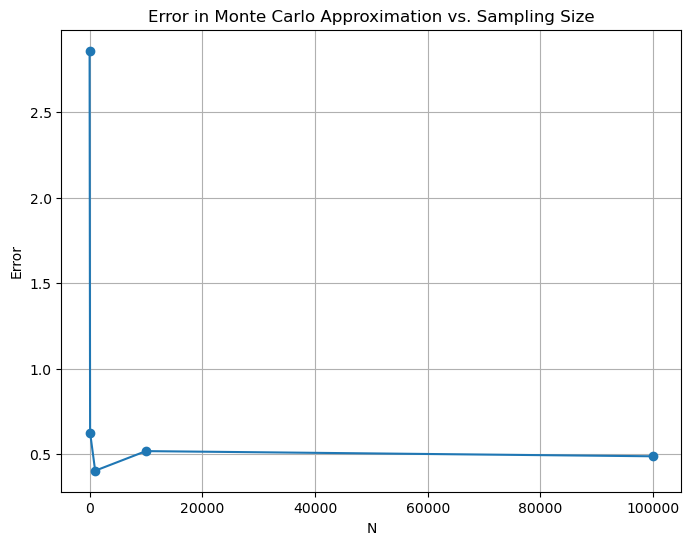

'--------------------Write your code above this line------------------------------'

In [3]:
'''--------------------Write your code below this line------------------------------'''

from numpy import sqrt, pi, arcsin

def integrand(x, beta, c):
    t_1 = 1 - (x/beta)**2
    t_2 = c**2 - (c*x/beta)**2
    valid = (t_1 >= 0) & (t_2 >= 0)
    return np.where(valid, beta * np.sqrt(t_1) * np.sqrt(1 + (2*np.sqrt(t_2)/c**2)**2), 0)
# I have to do this to avoid the value inside of square root lower than 0
def monte_carlo_integral(f, a, b, N, beta, c):
    x = np.random.uniform(a, b, N)
    integral_approximation = ((b - a) / N) * np.sum(f(x, beta, c))
    return integral_approximation

beta = 0.5
c = 1
sampling_sizes = [10, 100, 1000, 10000, 100000]
errors = []

e = sqrt(1 - (beta**2 / c**2))
exact_area = 2 * pi * beta**2 * (1 + (c / (beta * e)) * arcsin(e))

for N in sampling_sizes:
    monte_carlo_area = 2 * pi * monte_carlo_integral(integrand, -1, 1, N, beta, c)
    error = abs(monte_carlo_area - exact_area)
    errors.append(error)

# error against sample size
plt.figure(figsize=(8, 6))
plt.plot(sampling_sizes, errors, marker='o')
# plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error in Monte Carlo Approximation vs. Sampling Size')
plt.grid(True)
plt.show()



'''--------------------Write your code above this line------------------------------'''

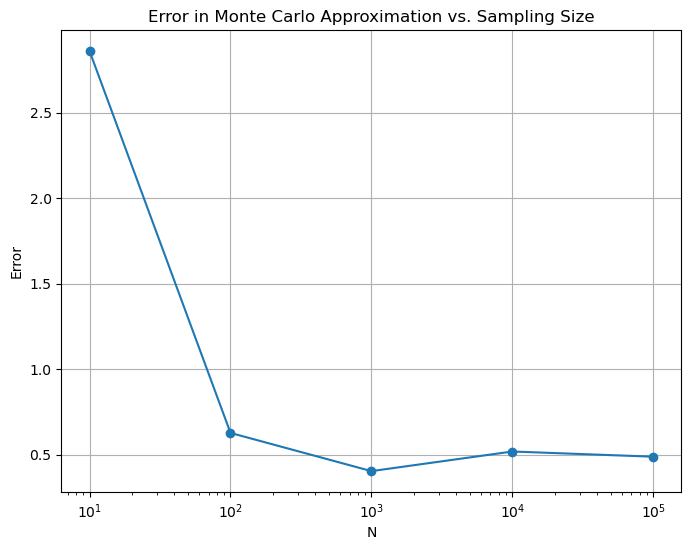

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(sampling_sizes, errors, marker='o')
plt.xscale("log")
plt.xlabel('N')
plt.ylabel('Error')
plt.title('Error in Monte Carlo Approximation vs. Sampling Size')
plt.grid(True)
plt.show()

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



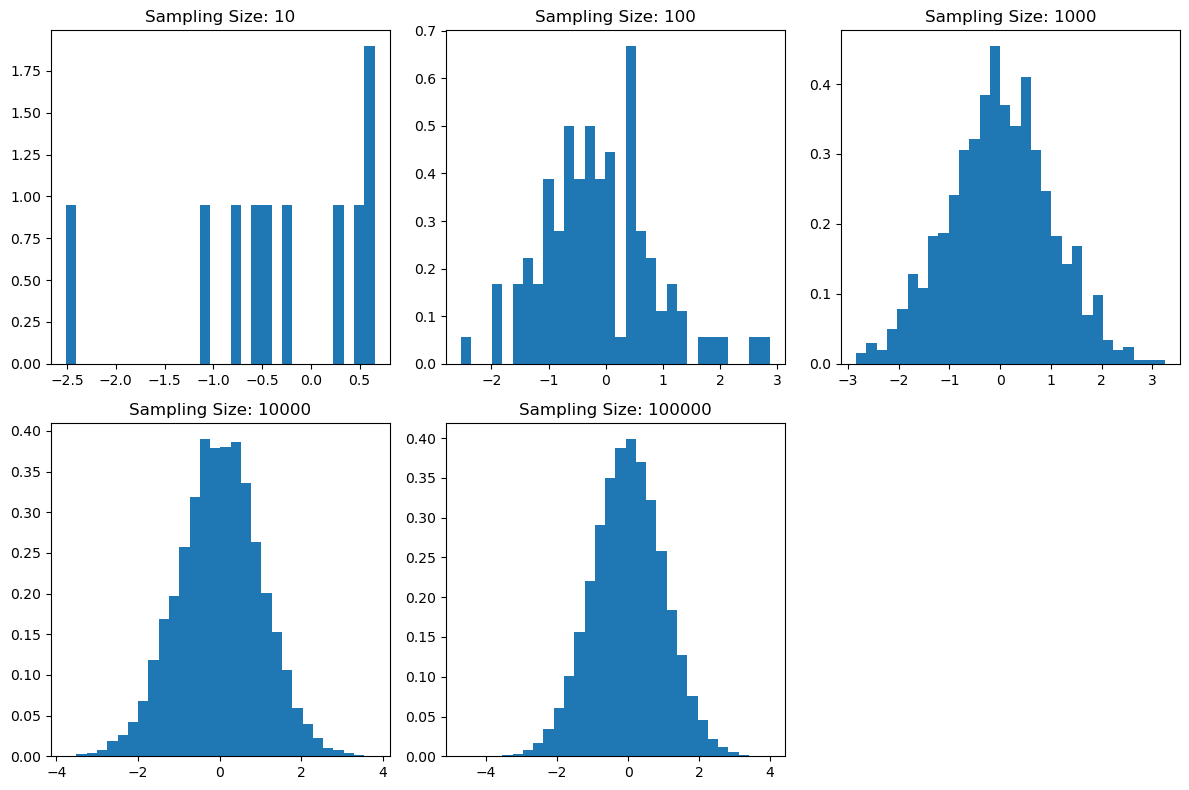

'--------------------Write your code above this line------------------------------'

In [5]:
'''--------------------Write your code below this line------------------------------'''
def box_muller(mu, sigma, N):
    U1, U2 = np.random.rand(N // 2), np.random.rand(N // 2)
    # Box-Muller transform
    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    Z = np.concatenate([Z0, Z1])
    return mu + sigma * Z

mu, sigma = 0, 1
sampling_sizes = [10, 100, 1000, 10000, 100000]

plt.figure(figsize=(12, 8))

for i, N in enumerate(sampling_sizes, 1):
    samples = box_muller(mu, sigma, N)
    plt.subplot(2, 3, i)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'Sampling Size: {N}')

plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





<Figure size 1500x500 with 0 Axes>

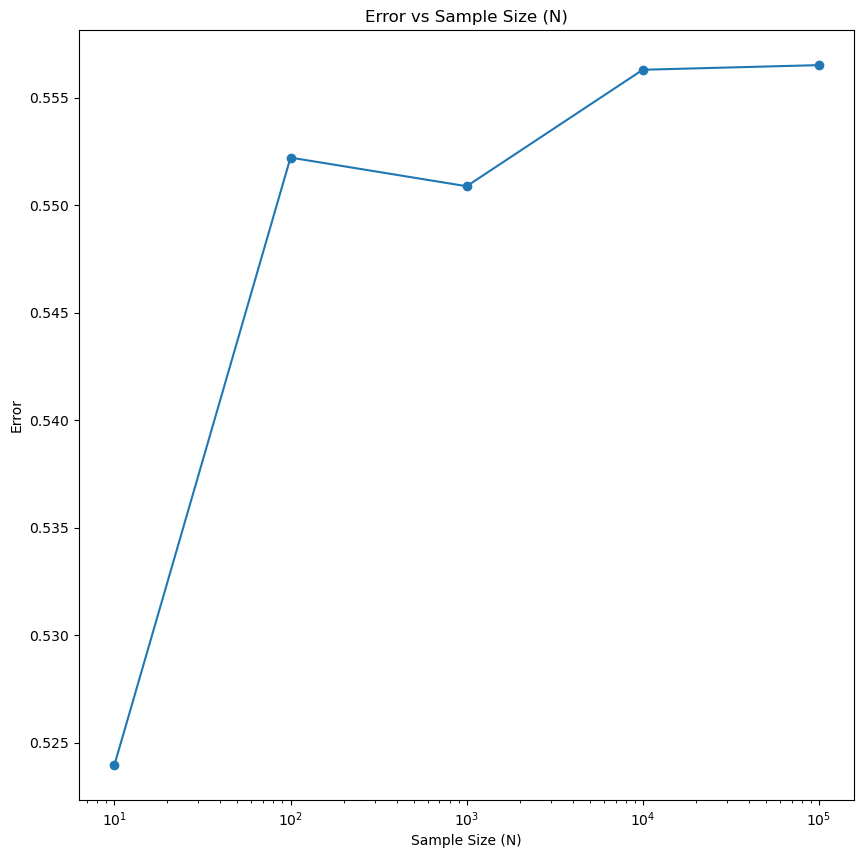

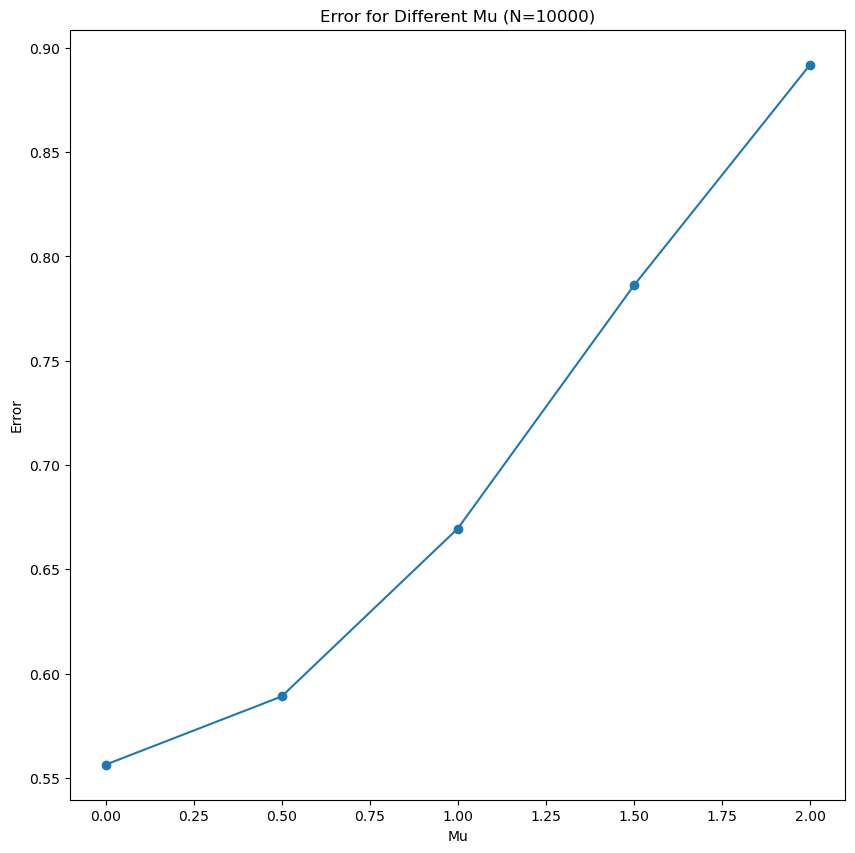

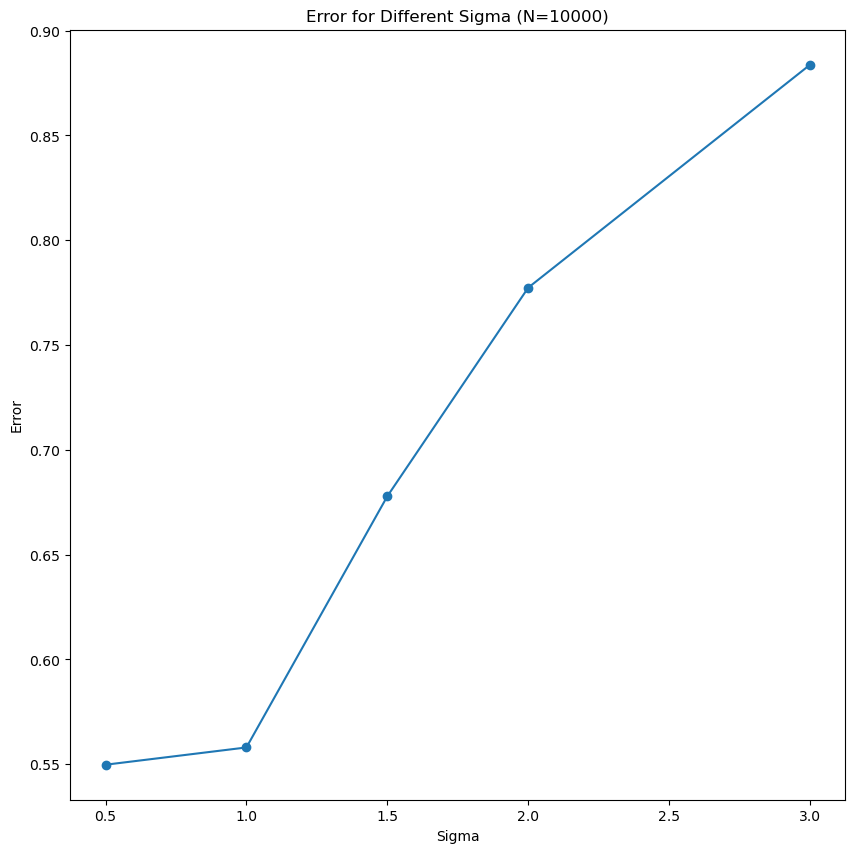

'--------------------Write your code above this line------------------------------'

In [12]:
'''--------------------Write your code below this line------------------------------'''
def monte_carlo_simulation(N, mu, sigma):
    X = np.random.normal(mu, sigma, N)
    Y = np.random.normal(mu, sigma, N)
    R = np.sqrt(X**2 + Y**2)
    estimate = np.mean(R * np.exp(-R**2 / 2))
    return estimate

exact_value = 1

# fix mu=0 and sigma=1, varying N
N_values = [10, 100, 1000, 10000, 100000]
errors_N = []

for N in N_values:
    estimate = monte_carlo_simulation(N, 0, 1)
    error = np.abs(estimate - exact_value)
    errors_N.append(error)

# fixed N=10000, varying mu 
fixed_N = 10000
mu_values = [0, 0.5, 1, 1.5, 2]
errors_mu = []

for mu in mu_values:
    estimate = monte_carlo_simulation(fixed_N, mu, 1)
    error = np.abs(estimate - exact_value)
    errors_mu.append(error)

# fixed N=10000, varying sigma
sigma_values = [0.5, 1, 1.5, 2, 3]
errors_sigma = []

for sigma in sigma_values:
    estimate = monte_carlo_simulation(fixed_N, 0, sigma)
    error = np.abs(estimate - exact_value)
    errors_sigma.append(error)

plt.figure(figsize=(15, 5))

# error vs Sample Size (N)
plt.figure(figsize=(10, 10))
plt.plot(N_values, errors_N, marker='o')
plt.xscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Error vs Sample Size (N)')
plt.show

# error for Different Mu
plt.figure(figsize=(10, 10))
plt.plot(mu_values, errors_mu, marker='o')
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error for Different Mu (N=10000)')
plt.show

# error for Different Sigma
plt.figure(figsize=(10, 10))
plt.plot(sigma_values, errors_sigma, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Error for Different Sigma (N=10000)')
plt.show()

# for this method, the error is lower in general especially for lower N

'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

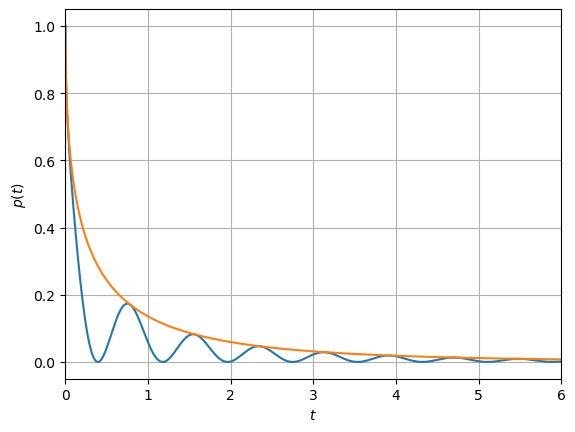

In [3]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



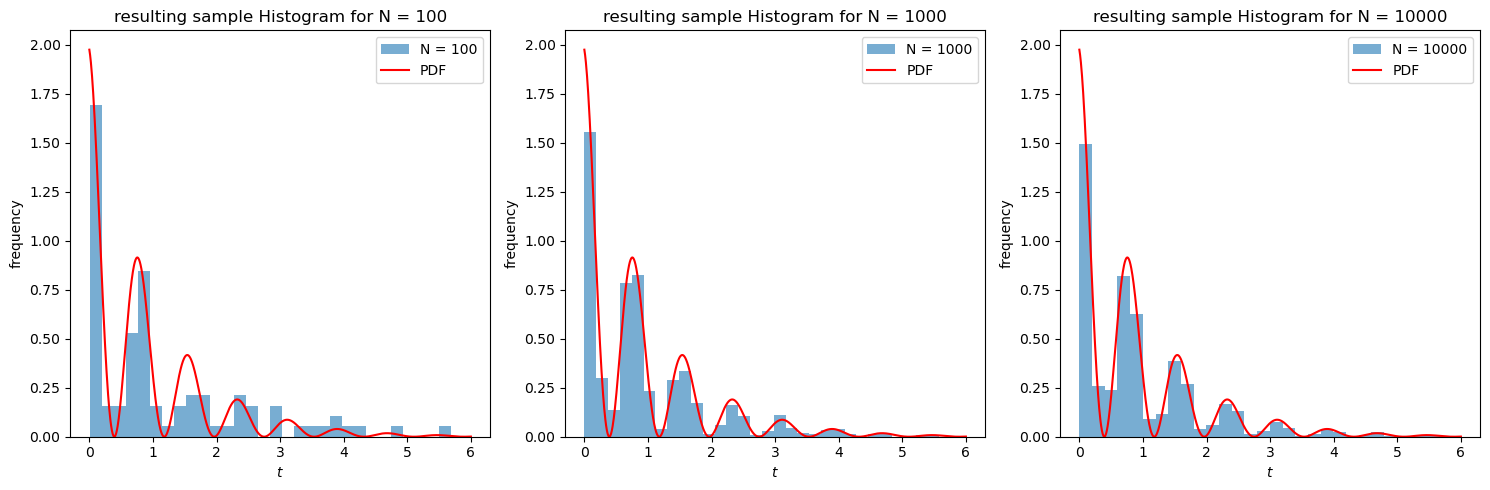

'--------------------Write your code above this line------------------------------'

In [13]:
'''--------------------Write your code below this line------------------------------'''
def p(t, a=4, b=1):
    return np.exp(-b * t) * np.cos(a * t)**2

def rejection_sampling(N, tf, a=4, b=1):
    samples = []
    max_p = np.max(p(np.linspace(0, tf, 1000), a, b))  # Maximum of p(t) in the interval [0, tf]

    while len(samples) < N:
        t_proposal = np.random.uniform(0, tf)
        u = np.random.uniform(0, max_p)

        if u < p(t_proposal, a, b):
            samples.append(t_proposal)

    return np.array(samples)

# tf is chosen so that it covers the part of the PDF where most of the probability mass is located
tf = 6
N_values = [100, 1000, 10000]
samples_dict = {N: rejection_sampling(N, tf) for N in N_values}

plt.figure(figsize=(15, 5))
for i, N in enumerate(N_values, 1):
    plt.subplot(1, 3, i)
    plt.hist(samples_dict[N], bins=30, density=True, alpha=0.6, label=f'N = {N}')
    t = np.linspace(0, tf, 1000)
    plt.plot(t, p(t)/np.trapz(p(t), t), 'r', label='PDF')
    plt.xlabel('$t$')
    plt.ylabel('frequency')
    plt.title(f'resulting sample Histogram for N = {N}')
    plt.legend()

plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


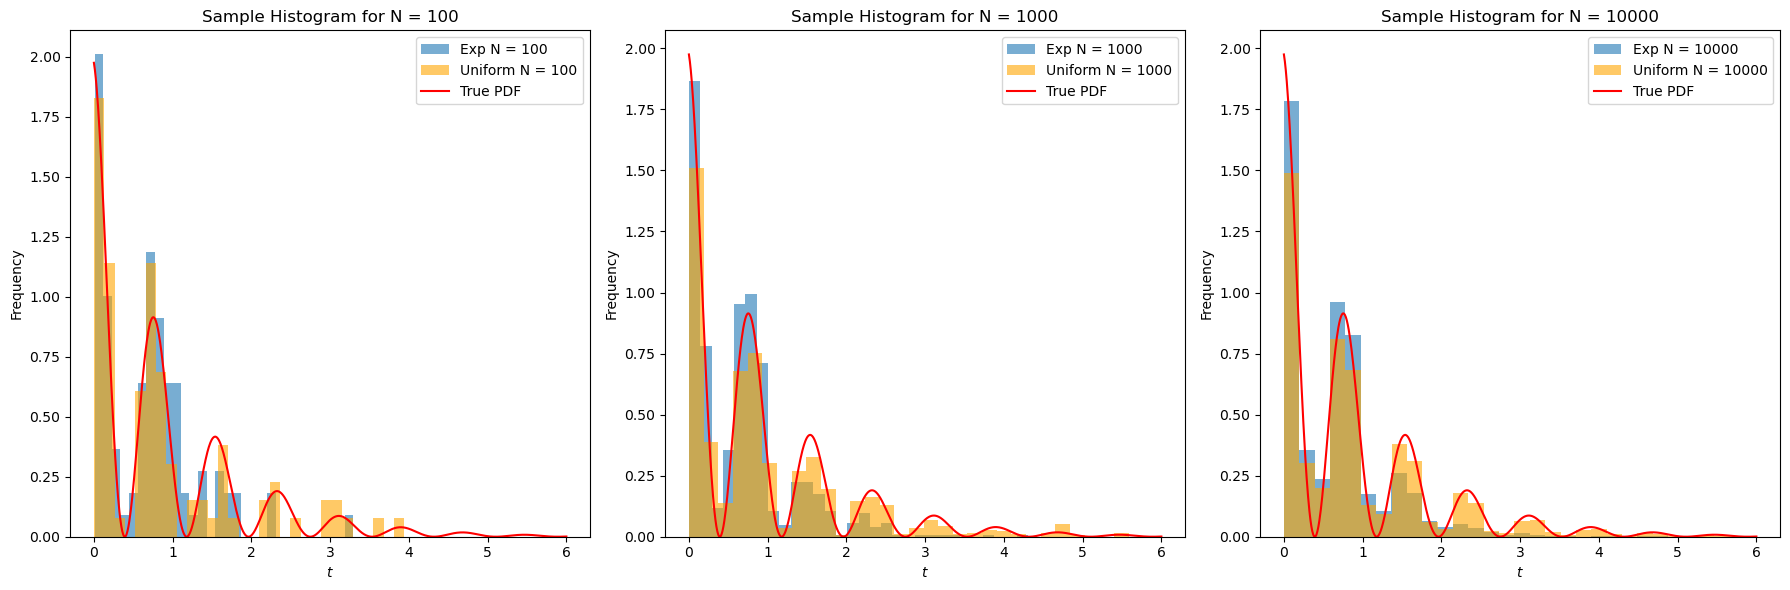

'--------------------Write your code above this line------------------------------'

In [13]:
'''--------------------Write your code below this line------------------------------'''

def p(t, a=4, b=1):
    return np.exp(-b * t) * np.cos(a * t)**2

def rejection_sampling_uniform(N, tf, a=4, b=1):
    samples = []
    max_p = np.max(p(np.linspace(0, tf, 1000), a, b))

    while len(samples) < N:
        t_proposal = np.random.uniform(0, tf)
        u = np.random.uniform(0, max_p)

        if u < p(t_proposal, a, b):
            samples.append(t_proposal)

    return np.array(samples)

def exponential_proposal(lambd, size):
    return np.random.exponential(1/lambd, size)

def rejection_sampling_exponential(N, a=4, b=1, lambd=2):
    samples = []
    while len(samples) < N:
        t_proposal = exponential_proposal(lambd, 1)[0]
        f_t_proposal = lambd * np.exp(-lambd * t_proposal)  # Probability density of exponential proposal
        p_t_proposal = p(t_proposal, a, b)
        u = np.random.uniform(0, 1)

        if u < p_t_proposal / f_t_proposal:
            samples.append(t_proposal)

    return np.array(samples)


N_values = [100, 1000, 10000]
tf = 6  # same as previous part

samples_dict_uniform = {N: rejection_sampling_uniform(N, tf) for N in N_values}
samples_dict_exp = {N: rejection_sampling_exponential(N) for N in N_values}

plt.figure(figsize=(18, 6))
for i, N in enumerate(N_values, 1):
    plt.subplot(1, 3, i)
    plt.hist(samples_dict_exp[N], bins=30, density=True, alpha=0.6, label=f'Exp N = {N}')
    plt.hist(samples_dict_uniform[N], bins=30, density=True, alpha=0.6, label=f'Uniform N = {N}', color='orange')
    t = np.linspace(0, tf, 1000)
    plt.plot(t, p(t)/np.trapz(p(t), t), 'r', label='True PDF')
    plt.xlabel('$t$')
    plt.ylabel('Frequency')
    plt.title(f'Sample Histogram for N = {N}')
    plt.legend()

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

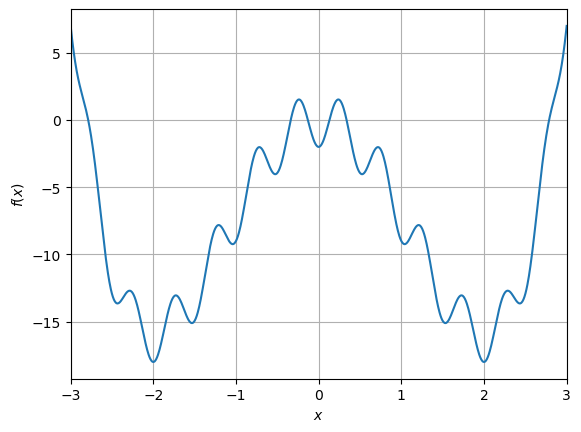

In [50]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

In [20]:
# !pip install opencv-python==4.8.0.74
# !pip install --upgrade numpy
import cv2
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 1.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.1.78
    Uninstalling opencv-python-4.8.1.78:
      Successfully uninstalled opencv-python-4.8.1.78


## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

In [40]:
'''--------------------Write your code below this line------------------------------'''
def H(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

def gradient_H(theta):
    return 4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta)

x = np.linspace(-3, 3, 1000)
y = H(x)

path = 'gradient_frames'
os.makedirs(path, exist_ok=True)

initial_guesses = [-1, 0.5, 3]
alpha = 0.01  # Learning rate
tolerance = 1e-5
frame_skip = 100
#max_iterations = 1000  # Maximum number of iterations

def gradient_descent(initial_guess, alpha, tolerance, frame_skip, max_iterations):
    theta = initial_guess
    iteration = 0
    frames = []

    while iteration < max_iterations:
        grad = gradient_H(theta)
        new_theta = theta - alpha * grad

        if iteration % frame_skip == 0 or np.abs(new_theta - theta) < tolerance:
            plt.figure()
            plt.plot(x, y)
            plt.scatter(theta, H(theta), color='red')
            plt.grid(True)
            plt.xlim(-3, 3)
            plt.xlabel('$x$')
            plt.ylabel('$f(x)$')
            frame_path = f'{path}/frame_{iteration}_{initial_guess}.png'
            plt.savefig(frame_path)
            plt.close()
            frames.append(frame_path)

        if np.abs(new_theta - theta) < tolerance:
            break

        theta = new_theta
        iteration += 1

    return theta, frames

results = {}
for guess in initial_guesses:
    final_theta, frames = gradient_descent(guess, alpha, tolerance, frame_skip, max_iterations)
    results[guess] = (final_theta, frames)

for guess, (final_theta, frames) in results.items():
    print(f"Initial guess: {guess}, Final theta: {final_theta}, Number of frames: {len(frames)}")

'''--------------------Write your code above this line------------------------------'''

Initial guess: -1, Final theta: -0.994152870829478, Number of frames: 100
Initial guess: 0.5, Final theta: 0.5477768810988456, Number of frames: 100
Initial guess: 3, Final theta: 2.455480353166009, Number of frames: 100


'--------------------Write your code above this line------------------------------'

In [41]:
def create_video(frames, output_path, fps=10):
    frame = cv2.imread(frames[0])
    height, width, layers = frame.shape

    video = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame in frames:
        video.write(cv2.imread(frame))

    cv2.destroyAllWindows()
    video.release()

# Create videos for each initial guess
for guess, (_, frames) in results.items():
    video_path = f'gradient_descent_{guess}.mp4'
    create_video(frames, video_path)
    print(f"Video saved to: {video_path}")

Video saved to: gradient_descent_-1.mp4
Video saved to: gradient_descent_0.5.mp4
Video saved to: gradient_descent_3.mp4


<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

In [44]:


'''--------------------Write your code below this line------------------------------'''
def metropolis_hastings(initial_theta, beta, sigma, steps):
    theta = initial_theta
    samples = [theta]

    for _ in range(steps):
        theta_star = theta + np.random.normal(0, sigma)
        delta_H = H(theta_star) - H(theta)
        r = np.exp(-beta * delta_H)

        if r > 1 or np.random.rand() < r:
            theta = theta_star

        samples.append(theta)

    return samples

initial_guesses = [-1, 0.5, 3]
T = 3 #varying T
beta = 1.0 / (T * 1.38e-23)
sigma = 0.1
steps = 1000

results = {}
for initial_theta in initial_guesses:
    samples = metropolis_hastings(initial_theta, beta, sigma, steps)
    results[initial_theta] = samples
print("samples:", samples)
'''--------------------Write your code above this line------------------------------'''

samples: [3, 2.9101050555778256, 2.9101050555778256, 2.808275154429358, 2.698346607115906, 2.698346607115906, 2.5934404397410082, 2.504468886723592, 2.504468886723592, 2.504468886723592, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.445039246795368, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.431634344682785, 2.4316343446827

/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_95794/3312416875.py:9: RuntimeWarning: overflow encountered in exp
  r = np.exp(-beta * delta_H)


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_95794/2791533218.py:13: RuntimeWarning: overflow encountered in exp
  r = np.exp(-beta * delta_H)


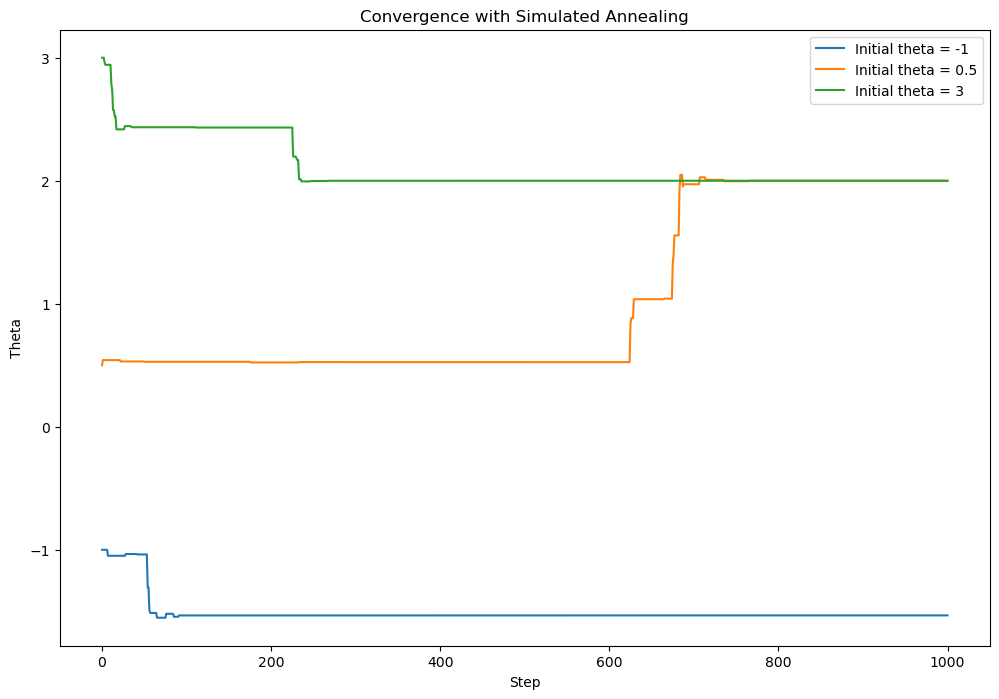

'--------------------Write your code above this line------------------------------'

In [46]:


'''--------------------Write your code below this line------------------------------'''
def simulated_annealing(initial_theta, beta, delta_beta, sigma, steps):
    theta = initial_theta
    samples = [theta]
    betas = [beta]

    for i in range(steps):
        theta_star = theta + np.random.normal(0, sigma)
        delta_H = H(theta_star) - H(theta)
        beta += delta_beta
        betas.append(beta)

        r = np.exp(-beta * delta_H)
        if r > np.random.rand():
            theta = theta_star

        samples.append(theta)
    return samples, betas

initial_guesses = [-1, 0.5, 3]
T = 3 #varying T
beta = 1.0 / (T * 1.38e-23)
delta_beta = 0.001
sigma = 0.1
steps = 1000

results_sa = {}
for initial_theta in initial_guesses:
    samples, betas = simulated_annealing(initial_theta, beta, delta_beta, sigma, steps)
    results_sa[initial_theta] = (samples, betas)
plt.figure(figsize=(12, 8))
for initial_theta, (samples, betas) in results_sa.items():
    plt.plot(samples, label=f'Initial theta = {initial_theta}')
plt.xlabel('Step')
plt.ylabel('Theta')
plt.title('Convergence with Simulated Annealing')
plt.legend()
plt.show()
'''--------------------Write your code above this line------------------------------'''